# CCTPY 核心概念

## CCTPY 是一个基于单线模型进行 CCT 磁场计算、束线建模、粒子跟踪的程序

## 核心概念——坐标系

**为了便于磁场建模、粒子跟踪、束流分析，CCTPY 中引入了全剧坐标系和局部坐标系的概念**

粒子 / 束流运动在全局坐标系中，一般在 XZ 平面内运行，如下图所示

<img src="./img/A01坐标_束流在XZ平面运行_三维.jpg" width=40%></img>

旋转一下示意图，只看 XZ 平面，如下图所示，可见一般而言磁铁也都放置在 XZ 平面。

<img src="./img/A02坐标_束流在XZ平面运行_二维加上磁铁.jpg" width=40%></img>

为了便于磁铁建模，每个磁铁附上了一个局部坐标系，目的是消除磁铁移动时的开销，局部坐标系如下图所示（图中三个绿色坐标系）

（因为 CCT 磁铁一般由上万个离散的点组成，如果移动 CCT 就要移动这么多的点，开销很大，但如果仅仅移动局部坐标系，则开销很小）

这样一样，为了计算磁铁对粒子产生的磁场，需要进行坐标变换，将粒子的坐标（全局坐标）转为该磁铁的局部坐标，转换完成后，即可计算磁场，而磁场本身也是矢量，所以需要转换回去（局部坐标系下的磁场转为全局坐标系）

<img src="./img/A03坐标_局部坐标系示意图.jpg" width=40%></img>

具体每种磁铁的局部坐标设置方法，详见各自介绍

## CCTPY 的使用

为了便于代码分发，所有 CCTPY 代码都写在了一个文件 cctpy.py 中，使用 from cctpy import * 可以如导入全部类

In [1]:
from cctpy import *
print(LIGHT_SPEED)

299792458.0


# 常量

CCTPY 中内置了一些常量，共有如下 9 个

In [2]:
print(f"1米{M}")
print(f"1毫米{MM}M")
print(f"光速{LIGHT_SPEED}")
print(f"1弧度{RAD}")
print(f"1毫弧度{MRAD}RAD")
print(f"1焦耳{J}")
print(f"1电子伏特{eV}J")
print(f"1兆电子伏特{MeV}J")
print(f"1MeV/c{MeV_PER_C}J")

1米1.0
1毫米0.001M
光速299792458.0
1弧度1.0
1毫弧度0.001RAD
1焦耳1.0
1电子伏特1.6021766208e-19J
1兆电子伏特1.6021766208000001e-13J
1MeV/c5.3442857792e-22J


# 点和矢量

点和矢量是 CCTPY 中最基本的概念，粒子的位置是一个点、粒子速度是一个矢量、CCT 磁铁路径由上万个点组成、磁场也是一个矢量

CCTPY 中严格区分 二维点/二维矢量 和 三维点/三维矢量，他们分别由类 P2 和类 P3 表示

## P2

P2 既可以表示二维坐标系中的点 (x, y)，也可以表示二维向量 (x, y)。它包含一下方便的运算操作

- 各种构造器
- length() 求矢量长度
- normalize() 矢量长度归一
- change_length(new_length) 改变矢量长度
- 矢量加法、减法、相反矢量、自加自减、乘法（内积、标量积）、相等判断
- rotate(phi) 矢量旋转(逆时针)
- angle_to_x_axis() 矢量和 x 轴夹角
- angle_to(other) 两个矢量夹角
- to_p3(transformation) 通过某种规则 P2 转换到 P3
- copy() 拷贝矢量


In [3]:
# 创建一个 (0,0)点/矢量
p1 = P2()
p2 = P2.origin()
p3 = P2.zeros()

p1, p2, p3

([0.0, 0.0], [0.0, 0.0], [0.0, 0.0])

In [4]:
# 创建一个 x 轴上的点，或者说和 x 轴平行的矢量
x1 = P2(x=3.14)
x2 = P2.x_direct(4.13)

# 创建一个 y 轴上的点，或者说和 y 轴平行的矢量
y1 = P2(y=6.28)
y2 = P2.y_direct(2.68)

x1, x2, y1, y2

([3.14, 0.0], [4.13, 0.0], [0.0, 6.28], [0.0, 2.68])

In [5]:
# 创建任意一个点，或矢量
p1 = P2(2,3)
p2 = P2(0.1,0.2)

p1, p2

([2.0, 3.0], [0.1, 0.2])

In [6]:
# 求矢量 P2 的长度，或点到原点的距离
p1 = P2(1,1)
p2 = P2(0,2)
p1_len = p1.length()
p2_len = p2.length()


# 矢量长度归一
p1_norm = p1.normalize()
p2_norm = p2.normalize()


# 改变矢量长度
p1_cl = p1.change_length(10)
p2_cl = p2.change_length(-10) # 负数改变了矢量方向

print("矢量长度",p1_len,p2_len)
print("长度归一",p1_norm,p2_norm)
print("改变矢量长度",p1_cl,p2_cl)

矢量长度 1.4142135623730951 2.0
长度归一 [0.7071067811865475, 0.7071067811865475] [0.0, 1.0]
改变矢量长度 [7.071067811865475, 7.071067811865475] [-0.0, -10.0]


In [7]:
# 矢量加法、减法
p1 = P2(2,3)
p2 = P2(1,1)
p_add = p1+p2
p_sub = p1-p2
print(f"p_add={p_add}")
print(f"p_sub={p_sub}")

# 相反矢量
p1_neg = -p1
p2_neg = -p2
print(f"p1_neg={p1_neg}")
print(f"p2_neg={p2_neg}")

# 自加自减，会修改自身大小
p1+=p2
print("自加",p1)

p1-=p2
print("自减",p1)

# 乘法（内积、标量积）
m1 = p1*p2
m2 = p2*p1
m3 = p1*3
m4 = 2*p2
print("内积",f"{p1}*{p2}={m1}")
print("内积",f"{p2}*{p1}={m2}")
print("标量积",f"{p1}*{3}={m3}")
print("标量积",f"{2}*{p2}={m4}")


# 相等判断
judge1 = p1==p2
judge2 = p1==p2+P2(1,2)
print("相等判断",f"{p1}=={p2} is {judge1}")
print("相等判断",f"{p1}=={p2}+{P2(1,2)} is {judge2}")

# 注意，因为浮点数误差，默认允许 1e-6 范围误差
print("相等判断，默认允许 1e-6 范围误差",f"{P2(0,0)}=={P2(1E-7,1E-8)} is {P2(0,0)==P2(1E-7,1E-8)}")
# 可以调用等号操作符 == 的原函数 __eq__ 指定误差
print("相等判断，指定误差",f"{P2(0,0)}=={P2(1E-7,1E-8)} is {P2(0,0).__eq__(P2(1E-7,1E-8), err=1e-10)}")


p_add=[3.0, 4.0]
p_sub=[1.0, 2.0]
p1_neg=[-2.0, -3.0]
p2_neg=[-1.0, -1.0]
自加 [3.0, 4.0]
自减 [2.0, 3.0]
内积 [2.0, 3.0]*[1.0, 1.0]=5.0
内积 [1.0, 1.0]*[2.0, 3.0]=5.0
标量积 [2.0, 3.0]*3=[6.0, 9.0]
标量积 2*[1.0, 1.0]=[2.0, 2.0]
相等判断 [2.0, 3.0]==[1.0, 1.0] is False
相等判断 [2.0, 3.0]==[1.0, 1.0]+[1.0, 2.0] is True
相等判断，默认允许 1e-6 范围误差 [0.0, 0.0]==[1e-07, 1e-08] is True
相等判断，指定误差 [0.0, 0.0]==[1e-07, 1e-08] is False


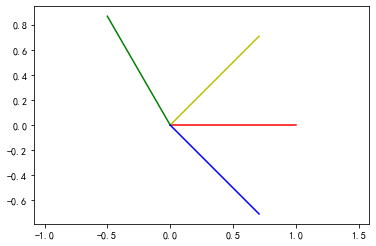

'\n注释： \nBaseUtils.angle_to_radian(deg) 角度转弧度\nPlot2.plot_p2s([], describe) 绘制由 P2 点组成的线\nPlot2.equal() 设置坐标轴 x 和 y 比例相等\nPlot2.show() 绘制图象\n'

In [8]:
# rotate(phi) 矢量旋转(逆时针)
p = P2(1,0)
p_rot45 = p.rotate(BaseUtils.angle_to_radian(45))
p_rot120 = p.rotate(BaseUtils.angle_to_radian(120))
p_rot_neg45 = p.rotate(BaseUtils.angle_to_radian(-45)) # 负数顺时针旋转

Plot2.plot_p2s([P2.origin(), p], 'r-')
Plot2.plot_p2s([P2.origin(), p_rot45], 'y-')
Plot2.plot_p2s([P2.origin(), p_rot120], 'g-')
Plot2.plot_p2s([P2.origin(), p_rot_neg45], 'b-')
Plot2.equal()
Plot2.show()

"""
注释： 
BaseUtils.angle_to_radian(deg) 角度转弧度
Plot2.plot_p2s([], describe) 绘制由 P2 点组成的线
Plot2.equal() 设置坐标轴 x 和 y 比例相等
Plot2.show() 绘制图象
"""

In [9]:
# 求矢量和 x 轴夹角
p = P2(1,1)
p1 = P2(1,-1)
p_angle_to_x = p.angle_to_x_axis()
p1_angle_to_x = p1.angle_to_x_axis()
print(f"{p_angle_to_x}, 转为角度 {BaseUtils.radian_to_angle(p_angle_to_x)}")
print(f"{p1_angle_to_x}, 转为角度 {BaseUtils.radian_to_angle(p1_angle_to_x)}")

# 求矢量 p1 到 p2 的夹角，顺时针方向
p2 = P2(-1,0)
p_to_p2 = p.angle_to(p2)
p2_to_p = p2.angle_to(p)
print(f"p_to_p2={p_to_p2}, 转为角度 {BaseUtils.radian_to_angle(p_to_p2)}")
print(f"p2_to_p={p2_to_p}, 转为角度 {BaseUtils.radian_to_angle(p2_to_p)}")


0.7853981633974483, 转为角度 45.0
5.497787143782138, 转为角度 315.0
p_to_p2=2.356194490192345, 转为角度 135.0
p2_to_p=3.9269908169872414, 转为角度 225.0


In [10]:
# to_p3(transformation) 通过某种规则 P2 转换到 P3
# 如果规则为空，则 (x, y) 转为 (x, y, 0)
p = P2(1,2)
p3 = p.to_p3()
print(p3)

# 可以指定一个 P2 到 P3 的函数
p3 = p.to_p3(lambda p:P3(z=p.x+p.y))
print(p3)

[1.0, 2.0, 0.0]
[0.0, 0.0, 3.0]


In [11]:
# copy()
p = P2(1,1)
p_copy = p.copy()
p.x = 3.14
print(f"p={p}, p_copy={p_copy}") 

p=[3.14, 1.0], p_copy=[1.0, 1.0]


## P3

P2 既可以表示三维坐标系中的点 (x, y, z)，也可以表示三维向量 (x, y, z)。它包含一下方便的运算操作

- 多种构造方法
- 矢量长度、归一化、改变矢量长度
- 加法、减法、相反数、自加、自减、乘法（标量乘、内积、**外积**）、相等判断
- copy() 拷贝

P3 的使用方法基本和 P2 相同，这里只展示构造方法和外积

In [12]:
# 构造 P3
# 使用构造器
p1 = P3()
p2 = P3(x=1,y=2)
p3 = P3(z=4,x=1)
p4 = P3(3.14,6.28,1.414)

print(p1,p2,p3,p4)

# 使用静态方法
p5 = P3.x_direct()
p6 = P3.y_direct(4)
p7 = P3.z_direct(-2)

print(p5,p6,p7)

# 两个特殊方法，构造原点和零矢量
p8 = P3.origin()
p9 = P3.zeros()
print(p8,p9)

[0.0, 0.0, 0.0] [1.0, 2.0, 0.0] [1.0, 0.0, 4.0] [3.14, 6.28, 1.414]
[1.0, 0.0, 0.0] [0.0, 4.0, 0.0] [0.0, 0.0, -2.0]
[0.0, 0.0, 0.0] [0.0, 0.0, 0.0]


In [13]:
# 三维矢量叉乘，使用符号 @
x = P3.x_direct()
y = P3.y_direct()
z = P3.z_direct()

print(f"x × y = {x@y}")
print(f"y × z = {y@z}")
print(f"z × x = {z@x}","单位矢量叉乘重要结论")

print(f"y × x = {y@x}","矢量叉乘不满足交换律")

x × y = [0.0, 0.0, 1.0]
y × z = [1.0, 0.0, 0.0]
z × x = [0.0, 1.0, 0.0] 单位矢量叉乘重要结论
y × x = [0.0, 0.0, -1.0] 矢量叉乘不满足交换律


# BaseUtils 基础工具

这个类中有许多基础的函数，便于程序开发

- equal() 判断两个对象是否相等，带有容忍误差，同时支持报错处理
- linspace()，同 numpy 中用于生成均匀分布的 linspace 方法
- angle_to_radian / radian_to_angle 角度和弧度互相转换
- print_traceback 打印函数调用栈（这个主要用于 debug）
- Ellipse 椭圆对象。用于生成椭圆圆周上均匀分布的若干点

In [14]:
# equal(a, b, err: float = 1e-6, msg: str = None) 判断两个对象是否相等，带有容忍误差，同时支持报错处理
# 判断 a b 是否相等，相等返回 true
# 当 a b 不相等时，若 msg 为空，返回 flase，否则抛出异常，异常信息即 msg
# err 表示容忍的误差，默认值 1e-6

print(BaseUtils.equal(1,2))
print(BaseUtils.equal(P2.origin(),P2.zeros()))
print(BaseUtils.equal(P3.z_direct(),P3(z=1)))

print(BaseUtils.equal(3.14, math.pi, err=0.01))

a = 1; b = 2
try:
    print(BaseUtils.equal(a,b,msg=f"出现错误，{a} 和 {b} 不相等"))
except AssertionError as ae:
    print(ae)


False
True
True
True
出现错误，1 和 2 不相等


In [15]:
# linspace(start, end, number: int)，同 numpy 中用于生成均匀分布的 linspace 方法

print(BaseUtils.linspace(0, 1, 5))
print(BaseUtils.linspace(P2(), P2(x=1), 5))
print(BaseUtils.linspace(P3(z=1), P3(), 3))

[0.0, 0.25, 0.5, 0.75, 1.0]
[[0.0, 0.0], [0.25, 0.0], [0.5, 0.0], [0.75, 0.0], [1.0, 0.0]]
[[0.0, 0.0, 1.0], [0.0, 0.0, 0.5], [0.0, 0.0, 0.0]]


In [19]:
# angle_to_radian(deg)
# radian_to_angle(rad)
# 角度和弧度互相转化，支持列表

print(BaseUtils.angle_to_radian(180))
print(BaseUtils.radian_to_angle([math.pi/10,math.pi/5,math.pi/3]))

3.141592653589793
[18.0, 36.0, 59.99999999999999]


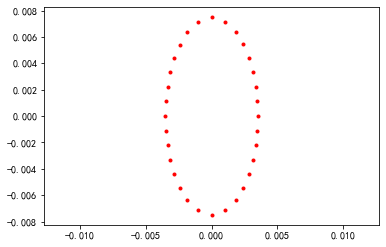

In [23]:
# Ellipse 椭圆对象。用于生成椭圆圆周上均匀分布的若干点
# 支持生成 Ax^2+Bxy+Cy^2=D 的椭圆

e = BaseUtils.Ellipse(A=1/(3.5*MM)**2,B=0,C=1/(7.5*MM)**2,D=1)

# 生成椭圆圆周上均匀分布的 32 个点
points = e.uniform_distribution_points_along_edge(32)
Plot2.plot_p2s(points,'r.')
Plot2.equal()
Plot2.show()

# Magnet 磁铁对象

# BeamlineObject 束线对象

# LocalCoordinateSystem 局部坐标系（重要概念）

# 用于刻画参考轨迹的对象 Line2 StraightLine2 ArcLine2 Trajectory

# Protons 用于质子的相关计算

# RunningParticle 表示全局坐标系中运动的一个粒子

# ParticleFactory 粒子工厂，用于方便的生成粒子

# ParticleRunner 粒子运动指挥所

# PhaseSpaceParticle 像空间中的粒子

# CCT 磁铁

# QS 磁铁

# 方便绘图的 Plot2 Plot3